## STUDENTS PERFORMANCE INDICATOR

### Life Cycle of Machine Learning Projects

1. Understanding the Problem Statement
2. Data collection
3. Data checks to perform
4. Exploratory data analysis
5. Data pre-processing
6. Model training
7. Choosing best model

### 1. Problem statement

This project understands how the performance of students/test score affected by various parameters such as Gender, Race/ethnicity, Parental level of education, Test preparation course.

### 2. Data collection

Dataset Scouce - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
> This dataset contains 1000 rows and 8 columns.

#### 2.1 Import Dataset and Required Packages

Importing library pandas, numpy, matplotlib, seaborn, warnings library

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import CSV as pandas dataframe

In [2]:
df=pd.read_csv(r"D:\Data_Science\notebook\data\stud.csv")

Top 5 records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of dataset

In [4]:
df.shape

(1000, 8)

> Overview of Dataset

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B, C, D, E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to Perform

- Check Missing Values
- Check Duplicates
- Check Data Types
- Check Statistical Description
- Check number of Unique values present in each Column
- Check various Categories present in the different categorical columns

#### 3.1 Check Missing values

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Insight :

>No missing values found in this dataset

#### 3.2 Check duplicates

In [6]:
df.duplicated().sum()

0

Insight :

> No dupcilate records found in the dataset

In [7]:
# Remove if there is duplicate values
df.drop_duplicates()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


#### 3.3 Check Data types 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Insight :

> Total 8 columns - 3 integer datatype and 5 object datatype 

#### 3.4 Check Statistical Description

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight :

> Mean for all Score are between 66 to 69.
> The least score student got in maths is 0, reading and writing is 17, 10 respectively.
> Maximum score student got in all subject is 100.

#### 3.5 Check number of unique values present in each column

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.6 Check various categories present in different categorical columns

In [11]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [12]:
print('Categories preset in "race_ethnicity" column:',end="  ")
print(df['race_ethnicity'].unique())

print('Categories present in "gender" column:',end="  ")
print(df['gender'].unique())

print('Categories present in "test_preparation_cpurse" column:',end="  ")
print(df['test_preparation_course'].unique())

print('Categories present in "parent_level_of_education" column:',end="  ")
print(df['parental_level_of_education'].unique())

print('Categories present in "lunch" column:',end="  ")
print(df['lunch'].unique())

Categories preset in "race_ethnicity" column:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories present in "gender" column:  ['female' 'male']
Categories present in "test_preparation_cpurse" column:  ['none' 'completed']
Categories present in "parent_level_of_education" column:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories present in "lunch" column:  ['standard' 'free/reduced']


In [13]:
#Numerical Features
numerical_column=[colm for colm in df.columns if df[colm].dtype !="O"]
print("{} Numerical Features: {}".format(len(numerical_column),numerical_column))

#Categorical Features
categorical_features=[feature for feature in df.columns if df[feature].dtype =="O"]
print("{} Categorical Features: {}".format(len(categorical_features),categorical_features))

3 Numerical Features: ['math_score', 'reading_score', 'writing_score']
5 Categorical Features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### 3.7 Add "Total" and "Average" column

In [14]:
df['total']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total']/3

In [15]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
math_full=df[df['math_score']==100]['average'].count()

read_full=df[df['reading_score']==100]['average'].count()

write_full=df[df['writing_score']==100]['average'].count()


print(f"Number of students full score in math: {math_full}")
print(f"Number of students full score in reading: {read_full}")
print(f"Number of students full in writing: {write_full}")

Number of students full score in math: 7
Number of students full score in reading: 17
Number of students full in writing: 14


In [17]:
math_less_20=df[df["math_score"]<=20]["average"].count()
read_less_20=df[df["reading_score"]<=20]["average"].count()
write_less_20=df[df["writing_score"]<=20]["average"].count()


print(f"Number of students less than 20 in math: {math_less_20}")
print(f"Number of students less than 20 in reading: {read_less_20}")
print(f'Number of students less than 20 in writing: {write_less_20}')

Number of students less than 20 in math: 4
Number of students less than 20 in reading: 1
Number of students less than 20 in writing: 3


Insight:

> We can say that students performed well in reading than writing and math. 
Need improvement in Math.

### 4. Visualization - Explore data

- Histogram
- Kernel Distribution Estimator (KDE)

In [18]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Male & Female students')

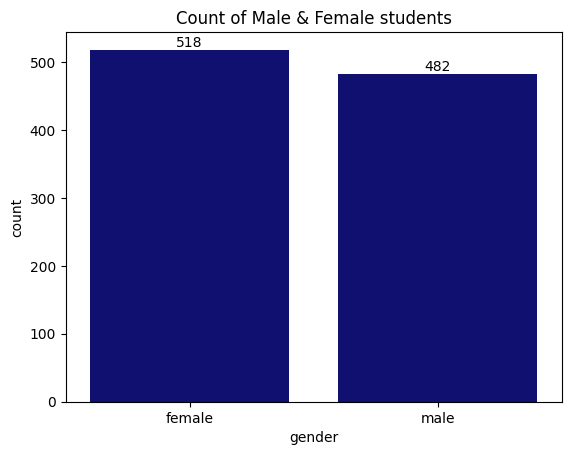

In [ ]:
ax=sns.countplot(data=df,x='gender',color='navy')
ax.bar_label(ax.containers[0])
plt.title("Count of Male & Female students")

Insights:
>- Slightly higher number of female students compare to male students.

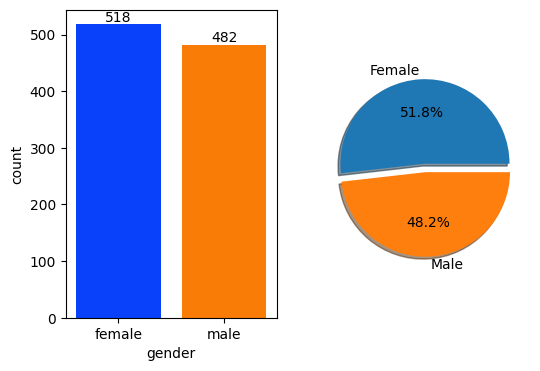

In [65]:

fig,ax=plt.subplots(1,2,figsize=(6,4))
sns.countplot(data=df,x='gender',palette='bright',ax=ax[0],saturation=0.95)


for container in ax[0].containers:
    ax[0].bar_label(container)

plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=(0,0.1),shadow=True,autopct='%.1f%%')
plt.show()



Text(0.5, 1.0, 'Average score of male and female students')

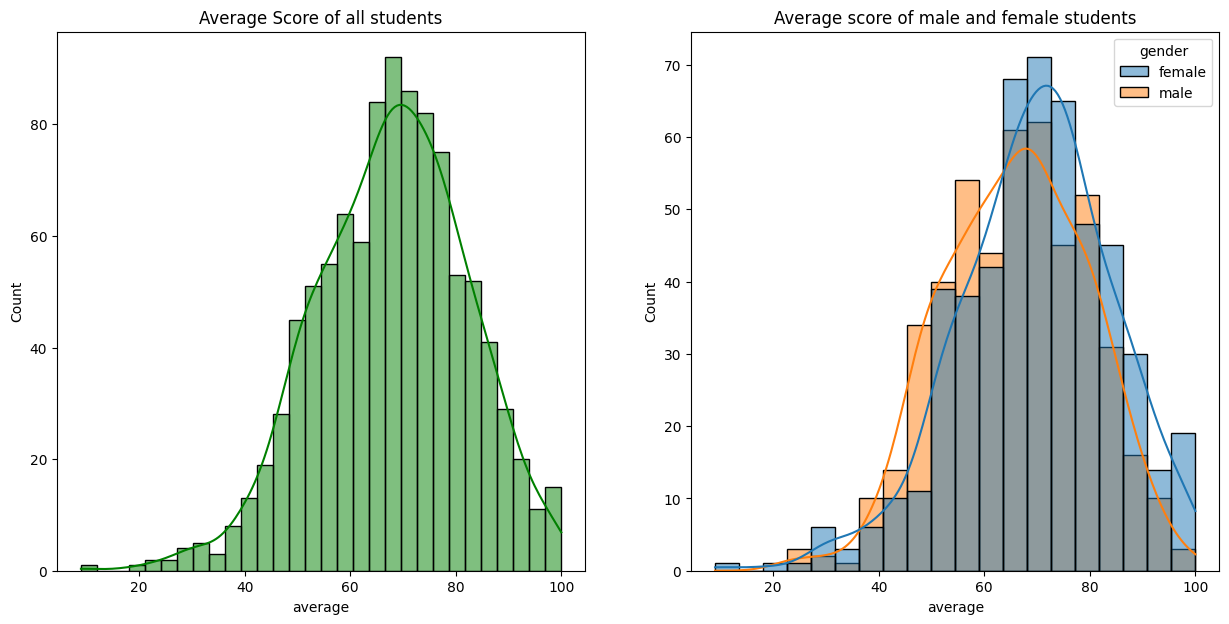

In [20]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="average",bins=30,kde=True,color='g')
plt.title("Average Score of all students")
plt.subplot(122)
sns.histplot(data=df,x="average",bins=20,hue='gender',kde=True)
plt.title("Average score of male and female students")

Text(0.5, 1.0, 'Comparing M & F students total Score')

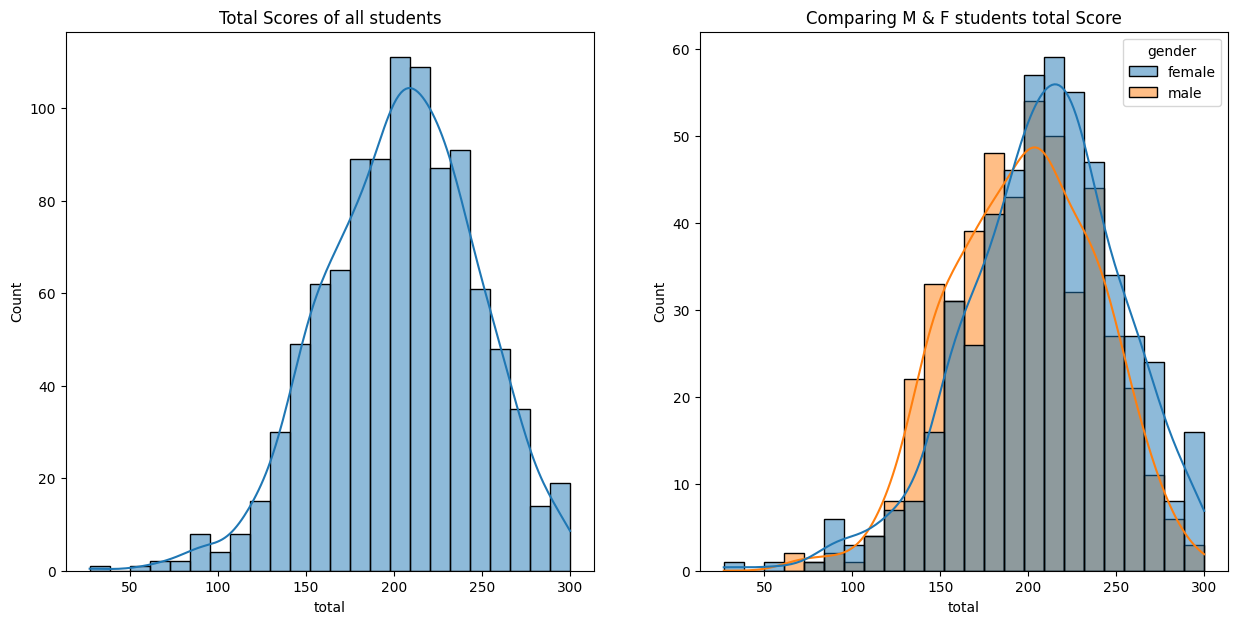

In [21]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="total",kde=True)
plt.title("Total Scores of all students")
plt.subplot(122)
sns.histplot(data=df,x='total',hue='gender',kde=True)
plt.title('Comparing M & F students total Score')

Insight:

>- Most of the female students got higher scores. 
>- Female students performed well than male students.

<Axes: xlabel='lunch', ylabel='count'>

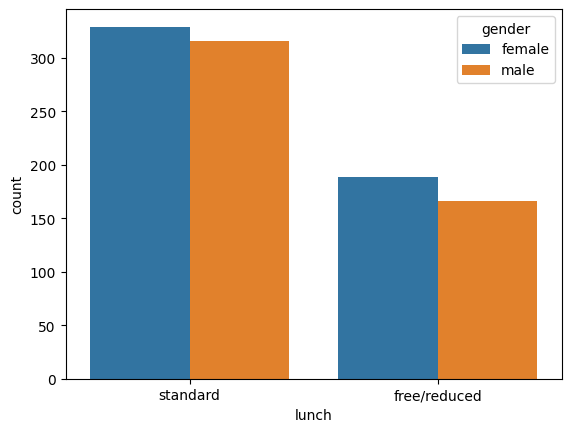

In [69]:
sns.countplot(data=df,x='lunch',hue='gender')

<Axes: xlabel='lunch', ylabel='Count'>

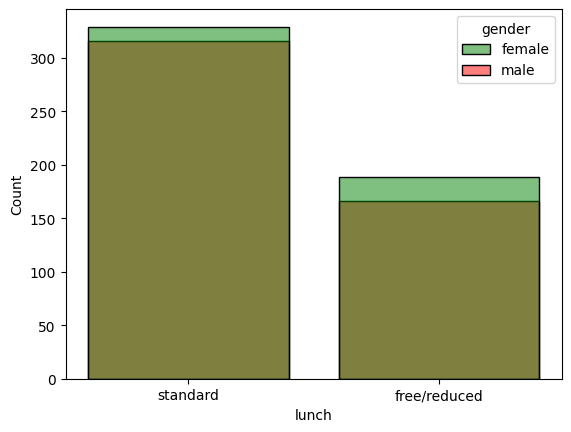

In [67]:
sns.histplot(data=df,x='lunch',hue='gender',palette={'female':'g', 'male':'r'},shrink=0.8)

Text(0.5, 1.0, 'Comparing Male average score and lunch')

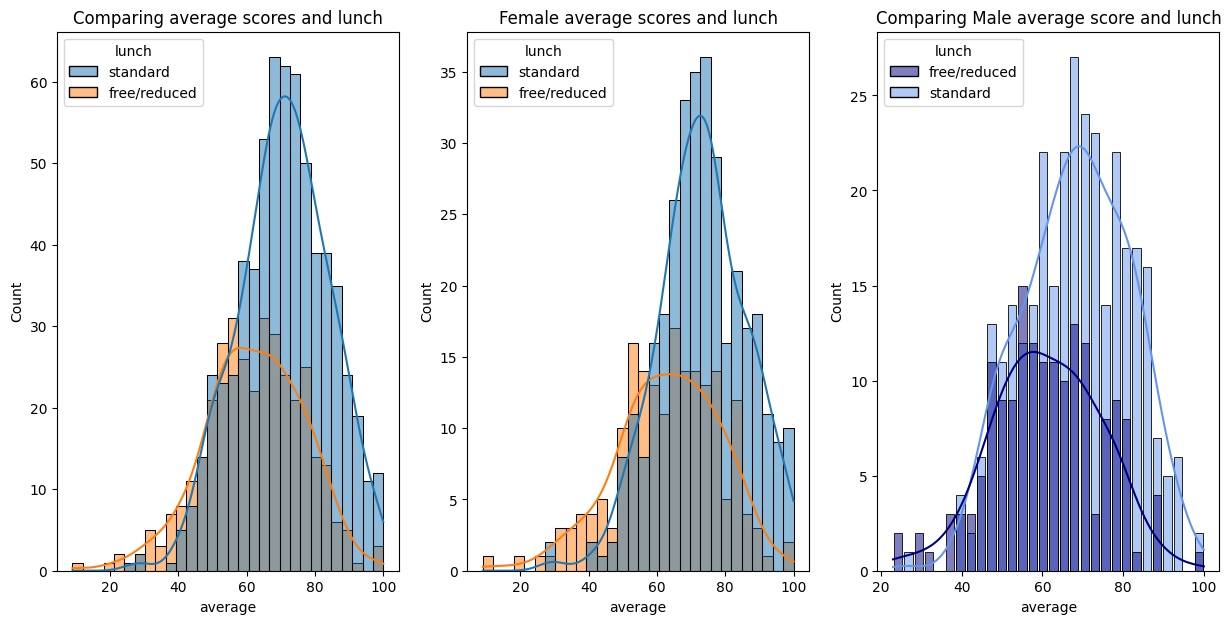

In [23]:
fig, ax=plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='lunch',color=['navy', 'cornflowerblue'])
plt.title("Comparing average scores and lunch")

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,kde=True,hue='lunch',color=['navy', 'cornflowerblue'])
plt.title("Female average scores and lunch")

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde=True,hue='lunch',palette={'free/reduced':'navy', 'standard':'cornflowerblue'},shrink=0.8)
plt.title("Comparing Male average score and lunch")

Text(0.5, 1.0, 'Male scores with parental level education')

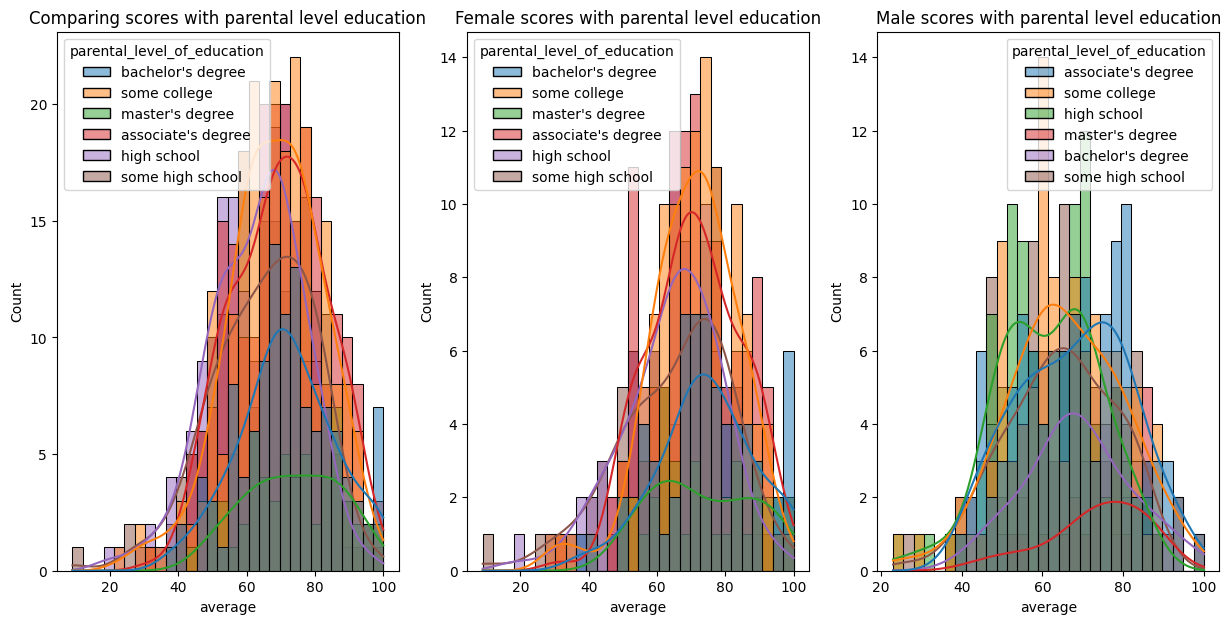

In [24]:
fig,ax=plt.subplots(1,3,figsize=(15,7))

plt.subplot(131)
sns.histplot(data=df,x='average',bins=30,kde=True,hue="parental_level_of_education")
plt.title("Comparing scores with parental level education")

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,kde=True,hue="parental_level_of_education")
plt.title("Female scores with parental level education")

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde=True,hue="parental_level_of_education")
plt.title("Male scores with parental level education")

Text(0.5, 1.0, 'Male scores with test_preparation_course')

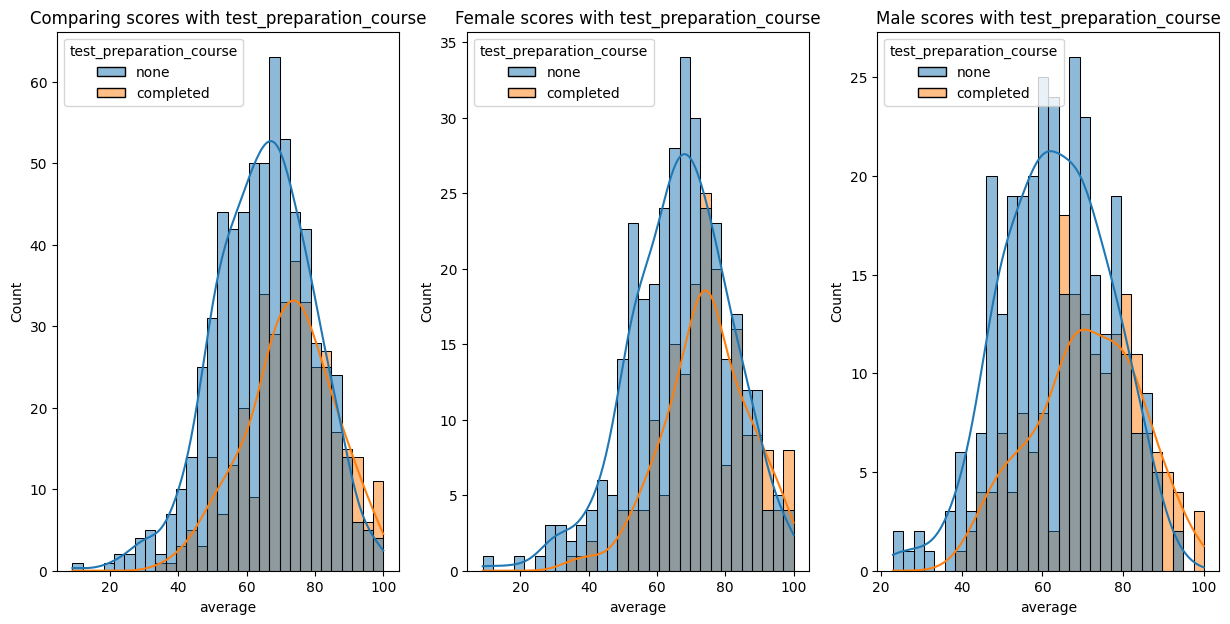

In [25]:
fig,ax=plt.subplots(1,3,figsize=(15,7))

plt.subplot(131)
sns.histplot(data=df,x='average',bins=30,kde=True,hue="test_preparation_course")
plt.title("Comparing scores with test_preparation_course")

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,kde=True,hue="test_preparation_course")
plt.title("Female scores with test_preparation_course")

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde=True,hue="test_preparation_course")
plt.title("Male scores with test_preparation_course")

Insights:
>- The test preparation course had a positive impact on students' scores.
>- Most of the students who completed the course successfully avoided scoring low.

Text(0.5, 1.0, 'Male scores with race/ethnicity')

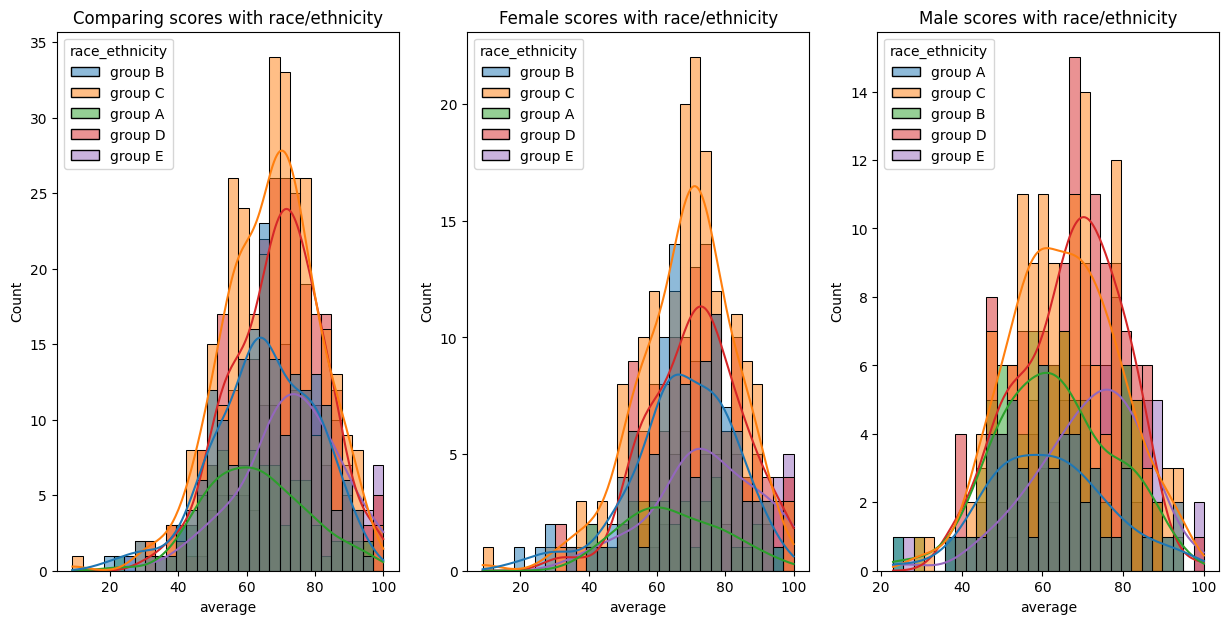

In [26]:
fig,ax=plt.subplots(1,3,figsize=(15,7))

plt.subplot(131)
sns.histplot(data=df,x='average',bins=30,kde=True,hue="race_ethnicity")
plt.title("Comparing scores with race/ethnicity")

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,kde=True,hue="race_ethnicity")
plt.title("Female scores with race/ethnicity")

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde=True,hue="race_ethnicity")
plt.title("Male scores with race/ethnicity")

Insights:
>- Group C performed well over all.
>- Group D male students performed well than other group males.
>- Students of Group A and Group E tends to perform poorly in exam irrespective of whether they are male or female.

#### 4.2 Maximum Score of students in all three subjects

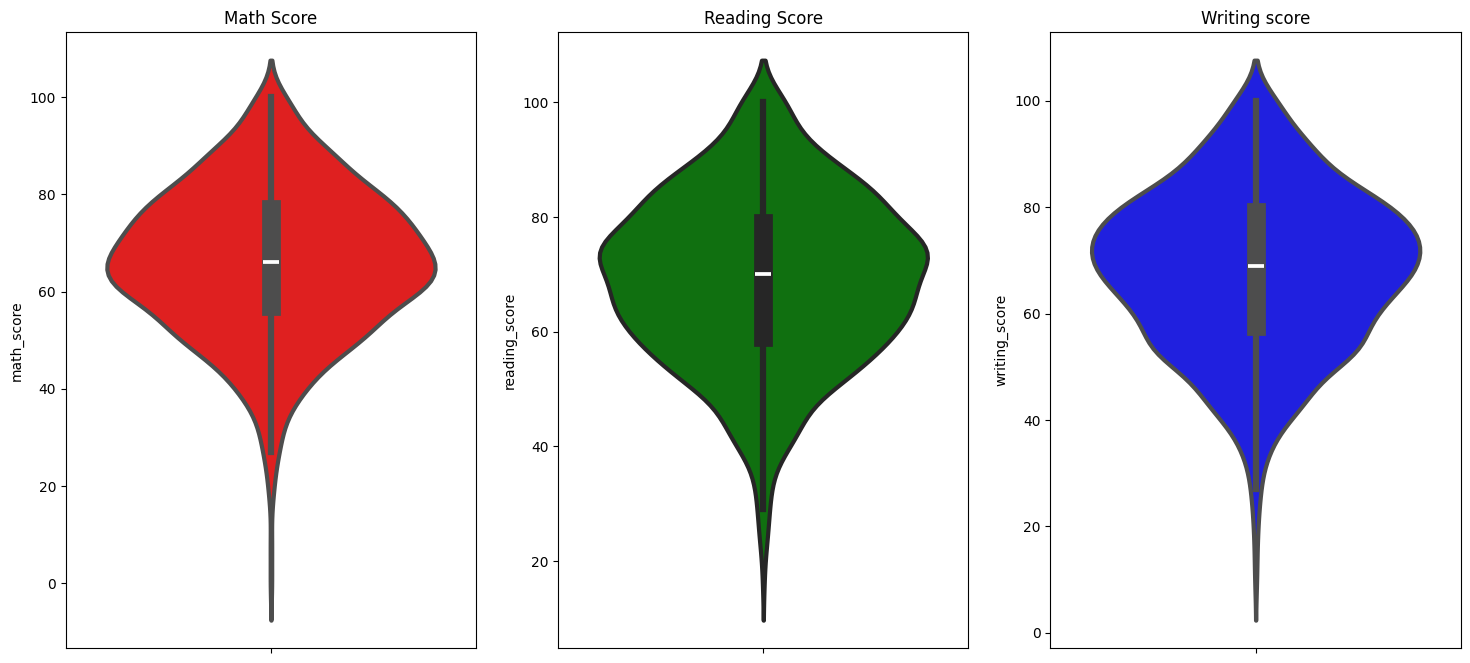

In [27]:
fig, ax = plt.subplots(1,3, figsize=(18,8))

plt.subplot(131)
sns.violinplot(data=df,y='math_score',color='r',linewidth=3)
plt.title("Math Score")

plt.subplot(132)
sns.violinplot(data=df,y='reading_score',color='g',linewidth=3)
plt.title("Reading Score")

plt.subplot(133)
sns.violinplot(data=df,y='writing_score',color='b',linewidth=3)
plt.title("Writing score")
plt.show()

Insights
>- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

In [28]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


In [29]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

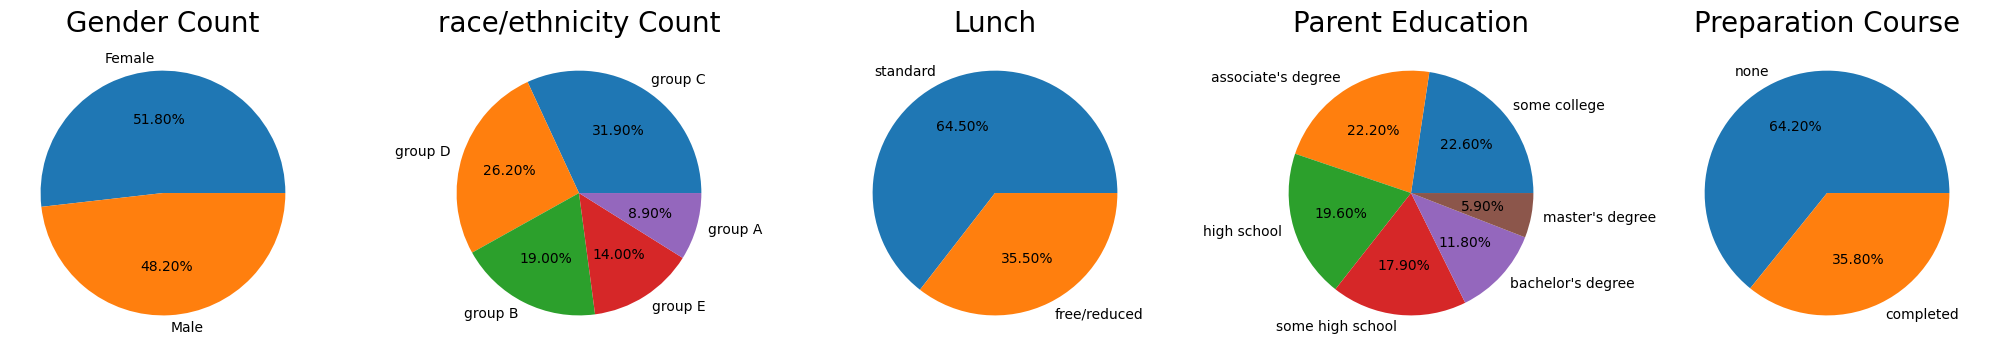

In [30]:
fig,ax=plt.subplots(1,5,figsize=(20,20))

#plt.rcParams['figure.figsize'] = (40, 15)

plt.subplot(1,5,1)
y=df['gender'].value_counts()
labels=['Female','Male']
plt.pie(y,labels=labels,autopct='%.2f%%')
plt.title("Gender Count",fontsize=20)


plt.subplot(1,5,2)
y=df['race_ethnicity'].value_counts()
labels=['group C','group D','group B','group E','group A']
plt.pie(y,labels=labels,autopct='%.2f%%')
plt.title("race/ethnicity Count",fontsize=20)


plt.subplot(1,5,3)
y=df['lunch'].value_counts()
labels=('standard','free/reduced')
plt.pie(y,labels=labels,autopct='%.2f%%')
plt.title("Lunch",fontsize=20)



plt.subplot(1,5,4)
y=df['parental_level_of_education'].value_counts()
labels=["some college","associate's degree","high school","some high school","bachelor's degree","master's degree"]
plt.pie(y,labels=labels,autopct='%.2f%%')
plt.title("Parent Education",fontsize=20)

plt.subplot(1,5,5)
y=df['test_preparation_course'].value_counts()
labels='none','completed'
plt.pie(y,labels=labels,autopct='%.2f%%')
plt.title("Preparation Course",fontsize=20)


plt.tight_layout()

plt.show()


Insights:
>- The number of male and female students is nearly equal.
>- Groups C and D have the highest strength, while Group A has the lowest, followed by Group E.
>- The majority of students opt for a standard lunch.
>- Most parents have an educational background of "some college" or an associate's degree, while fewer parents have a master's degree.
>- Only a small number of students have completed the test preparation course.

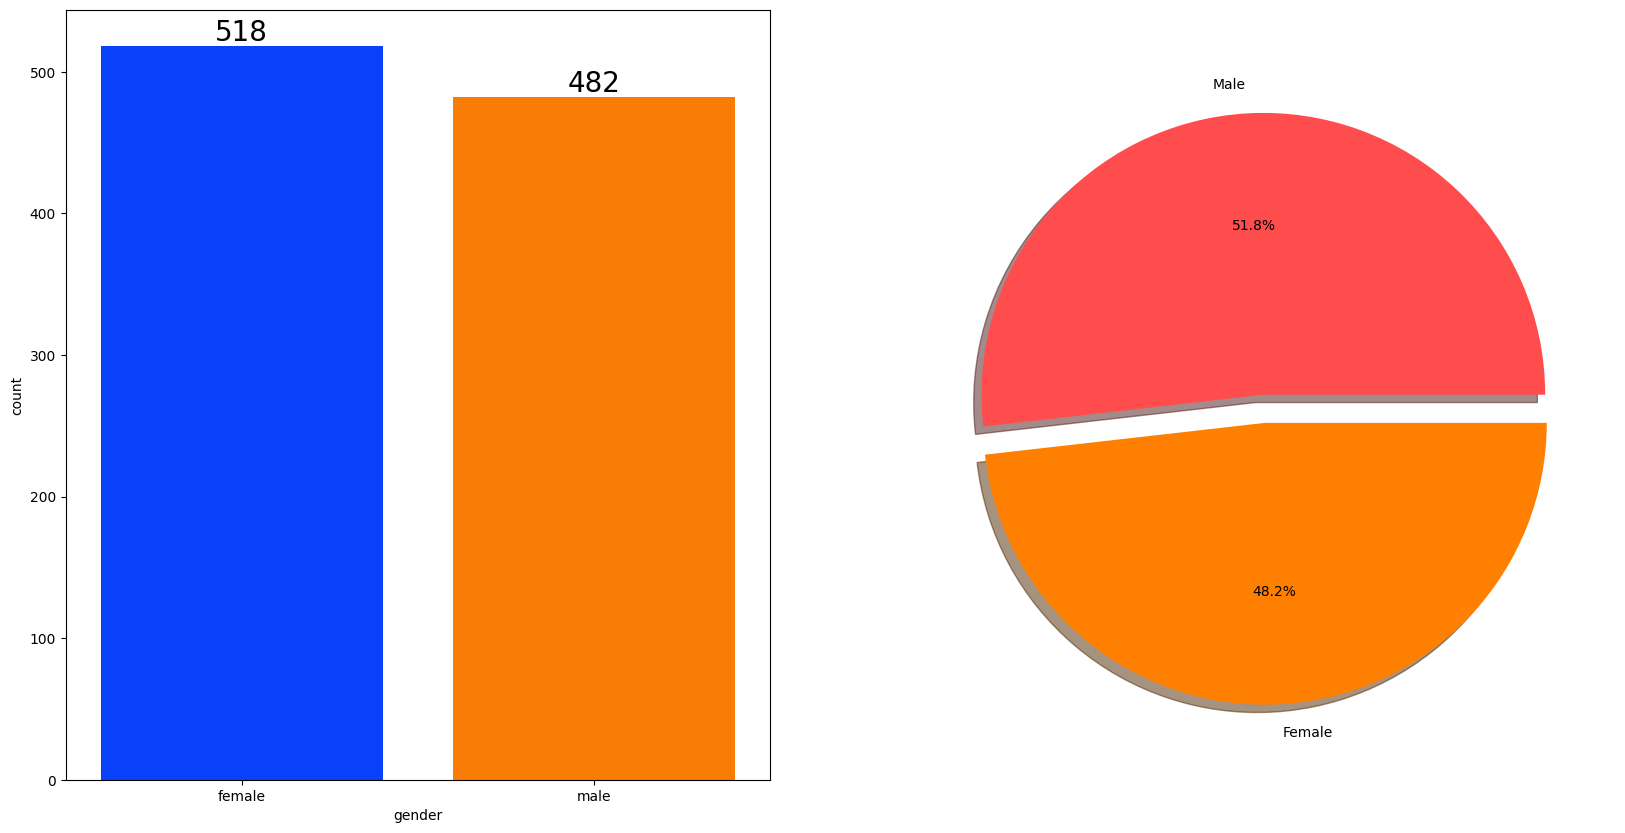

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [32]:
gender_group = df.groupby('gender').mean()
gender_group

TypeError: Could not convert group Bgroup Cgroup Bgroup Bgroup Bgroup Bgroup Bgroup Agroup Cgroup Bgroup Cgroup Bgroup Cgroup Cgroup Dgroup Dgroup Bgroup Egroup Dgroup Dgroup Dgroup Cgroup Bgroup Egroup Agroup Cgroup Dgroup Cgroup Cgroup Egroup Cgroup Cgroup Dgroup Cgroup Cgroup Dgroup Agroup Dgroup Egroup Bgroup Cgroup Cgroup Dgroup Agroup Dgroup Cgroup Bgroup Egroup Dgroup Dgroup Dgroup Cgroup Dgroup Bgroup Bgroup Dgroup Dgroup Egroup Bgroup Dgroup Dgroup Cgroup Cgroup Cgroup Bgroup Agroup Cgroup Cgroup Dgroup Cgroup Egroup Cgroup Dgroup Bgroup Cgroup Egroup Bgroup Egroup Egroup Cgroup Bgroup Bgroup Cgroup Dgroup Cgroup Cgroup Cgroup Bgroup Cgroup Bgroup Dgroup Cgroup Egroup Dgroup Cgroup Egroup Bgroup Cgroup Bgroup Bgroup Cgroup Dgroup Bgroup Bgroup Bgroup Cgroup Egroup Cgroup Dgroup Cgroup Bgroup Egroup Cgroup Cgroup Bgroup Dgroup Egroup Dgroup Bgroup Bgroup Dgroup Bgroup Egroup Cgroup Bgroup Cgroup Cgroup Cgroup Egroup Cgroup Dgroup Dgroup Egroup Dgroup Dgroup Cgroup Egroup Cgroup Dgroup Dgroup Bgroup Bgroup Egroup Cgroup Cgroup Bgroup Dgroup Bgroup Cgroup Cgroup Dgroup Dgroup Cgroup Egroup Cgroup Cgroup Cgroup Cgroup Bgroup Cgroup Bgroup Bgroup Dgroup Cgroup Bgroup Cgroup Cgroup Bgroup Cgroup Cgroup Cgroup Bgroup Cgroup Dgroup Bgroup Cgroup Dgroup Agroup Dgroup Cgroup Dgroup Dgroup Dgroup Dgroup Agroup Bgroup Egroup Agroup Egroup Egroup Cgroup Dgroup Dgroup Cgroup Bgroup Cgroup Cgroup Agroup Dgroup Cgroup Cgroup Bgroup Dgroup Dgroup Cgroup Cgroup Dgroup Dgroup Agroup Cgroup Cgroup Agroup Cgroup Dgroup Agroup Bgroup Cgroup Cgroup Egroup Cgroup Cgroup Dgroup Egroup Egroup Cgroup Cgroup Dgroup Agroup Cgroup Cgroup Cgroup Dgroup Bgroup Dgroup Dgroup Dgroup Bgroup Cgroup Agroup Cgroup Cgroup Cgroup Bgroup Cgroup Dgroup Bgroup Dgroup Bgroup Egroup Dgroup Bgroup Cgroup Bgroup Bgroup Cgroup Dgroup Egroup Dgroup Bgroup Cgroup Cgroup Dgroup Cgroup Cgroup Cgroup Egroup Cgroup Dgroup Cgroup Dgroup Dgroup Agroup Cgroup Bgroup Cgroup Cgroup Bgroup Dgroup Cgroup Dgroup Egroup Dgroup Cgroup Cgroup Egroup Bgroup Bgroup Dgroup Dgroup Egroup Dgroup Dgroup Dgroup Cgroup Agroup Cgroup Cgroup Agroup Egroup Cgroup Cgroup Dgroup Dgroup Dgroup Cgroup Egroup Cgroup Cgroup Egroup Bgroup Cgroup Cgroup Agroup Cgroup Egroup Cgroup Egroup Cgroup Bgroup Cgroup Bgroup Dgroup Dgroup Dgroup Bgroup Egroup Bgroup Dgroup Egroup Bgroup Dgroup Agroup Dgroup Agroup Bgroup Bgroup Dgroup Dgroup Cgroup Cgroup Cgroup Bgroup Cgroup Cgroup Cgroup Dgroup Bgroup Egroup Cgroup Dgroup Cgroup Egroup Cgroup Egroup Cgroup Dgroup Cgroup Dgroup Cgroup Agroup Dgroup Egroup Bgroup Dgroup Bgroup Dgroup Egroup Dgroup Bgroup Bgroup Cgroup Cgroup Cgroup Bgroup Egroup Dgroup Bgroup Cgroup Egroup Bgroup Agroup Cgroup Cgroup Cgroup Cgroup Egroup Dgroup Cgroup Dgroup Bgroup Bgroup Cgroup Dgroup Bgroup Cgroup Bgroup Bgroup Cgroup Agroup Dgroup Bgroup Bgroup Cgroup Bgroup Egroup Bgroup Cgroup Bgroup Dgroup Bgroup Egroup Egroup Cgroup Egroup Bgroup Cgroup Dgroup Egroup Cgroup Cgroup Agroup Bgroup Cgroup Agroup Dgroup Bgroup Cgroup Cgroup Cgroup Dgroup Agroup Cgroup Bgroup Cgroup Agroup Cgroup Dgroup Bgroup Dgroup Cgroup Agroup Egroup Bgroup Cgroup Cgroup Egroup Cgroup Cgroup Cgroup Dgroup Dgroup Egroup Bgroup Egroup Cgroup Egroup Dgroup Egroup Egroup Agroup Egroup Egroup Bgroup Dgroup Cgroup Agroup Dgroup Dgroup Dgroup Cgroup Agroup Cgroup Cgroup Bgroup Egroup Cgroup Cgroup Cgroup Bgroup Dgroup Cgroup Egroup Dgroup Bgroup Cgroup Dgroup Egroup Dgroup Egroup Cgroup Dgroup Dgroup Agroup Dgroup Egroup Cgroup Dgroup Egroup Bgroup Dgroup Agroup Dgroup Agroup Cgroup Cgroup Bgroup Agroup Cgroup Cgroup Agroup Dgroup Bgroup Dgroup Dgroup Egroup Cgroup Dgroup D to numeric

In [ ]:



plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

TypeError: Could not convert group Bgroup Cgroup Bgroup Bgroup Bgroup Bgroup Bgroup Agroup Cgroup Bgroup Cgroup Bgroup Cgroup Cgroup Dgroup Dgroup Bgroup Egroup Dgroup Dgroup Dgroup Cgroup Bgroup Egroup Agroup Cgroup Dgroup Cgroup Cgroup Egroup Cgroup Cgroup Dgroup Cgroup Cgroup Dgroup Agroup Dgroup Egroup Bgroup Cgroup Cgroup Dgroup Agroup Dgroup Cgroup Bgroup Egroup Dgroup Dgroup Dgroup Cgroup Dgroup Bgroup Bgroup Dgroup Dgroup Egroup Bgroup Dgroup Dgroup Cgroup Cgroup Cgroup Bgroup Agroup Cgroup Cgroup Dgroup Cgroup Egroup Cgroup Dgroup Bgroup Cgroup Egroup Bgroup Egroup Egroup Cgroup Bgroup Bgroup Cgroup Dgroup Cgroup Cgroup Cgroup Bgroup Cgroup Bgroup Dgroup Cgroup Egroup Dgroup Cgroup Egroup Bgroup Cgroup Bgroup Bgroup Cgroup Dgroup Bgroup Bgroup Bgroup Cgroup Egroup Cgroup Dgroup Cgroup Bgroup Egroup Cgroup Cgroup Bgroup Dgroup Egroup Dgroup Bgroup Bgroup Dgroup Bgroup Egroup Cgroup Bgroup Cgroup Cgroup Cgroup Egroup Cgroup Dgroup Dgroup Egroup Dgroup Dgroup Cgroup Egroup Cgroup Dgroup Dgroup Bgroup Bgroup Egroup Cgroup Cgroup Bgroup Dgroup Bgroup Cgroup Cgroup Dgroup Dgroup Cgroup Egroup Cgroup Cgroup Cgroup Cgroup Bgroup Cgroup Bgroup Bgroup Dgroup Cgroup Bgroup Cgroup Cgroup Bgroup Cgroup Cgroup Cgroup Bgroup Cgroup Dgroup Bgroup Cgroup Dgroup Agroup Dgroup Cgroup Dgroup Dgroup Dgroup Dgroup Agroup Bgroup Egroup Agroup Egroup Egroup Cgroup Dgroup Dgroup Cgroup Bgroup Cgroup Cgroup Agroup Dgroup Cgroup Cgroup Bgroup Dgroup Dgroup Cgroup Cgroup Dgroup Dgroup Agroup Cgroup Cgroup Agroup Cgroup Dgroup Agroup Bgroup Cgroup Cgroup Egroup Cgroup Cgroup Dgroup Egroup Egroup Cgroup Cgroup Dgroup Agroup Cgroup Cgroup Cgroup Dgroup Bgroup Dgroup Dgroup Dgroup Bgroup Cgroup Agroup Cgroup Cgroup Cgroup Bgroup Cgroup Dgroup Bgroup Dgroup Bgroup Egroup Dgroup Bgroup Cgroup Bgroup Bgroup Cgroup Dgroup Egroup Dgroup Bgroup Cgroup Cgroup Dgroup Cgroup Cgroup Cgroup Egroup Cgroup Dgroup Cgroup Dgroup Dgroup Agroup Cgroup Bgroup Cgroup Cgroup Bgroup Dgroup Cgroup Dgroup Egroup Dgroup Cgroup Cgroup Egroup Bgroup Bgroup Dgroup Dgroup Egroup Dgroup Dgroup Dgroup Cgroup Agroup Cgroup Cgroup Agroup Egroup Cgroup Cgroup Dgroup Dgroup Dgroup Cgroup Egroup Cgroup Cgroup Egroup Bgroup Cgroup Cgroup Agroup Cgroup Egroup Cgroup Egroup Cgroup Bgroup Cgroup Bgroup Dgroup Dgroup Dgroup Bgroup Egroup Bgroup Dgroup Egroup Bgroup Dgroup Agroup Dgroup Agroup Bgroup Bgroup Dgroup Dgroup Cgroup Cgroup Cgroup Bgroup Cgroup Cgroup Cgroup Dgroup Bgroup Egroup Cgroup Dgroup Cgroup Egroup Cgroup Egroup Cgroup Dgroup Cgroup Dgroup Cgroup Agroup Dgroup Egroup Bgroup Dgroup Bgroup Dgroup Egroup Dgroup Bgroup Bgroup Cgroup Cgroup Cgroup Bgroup Egroup Dgroup Bgroup Cgroup Egroup Bgroup Agroup Cgroup Cgroup Cgroup Cgroup Egroup Dgroup Cgroup Dgroup Bgroup Bgroup Cgroup Dgroup Bgroup Cgroup Bgroup Bgroup Cgroup Agroup Dgroup Bgroup Bgroup Cgroup Bgroup Egroup Bgroup Cgroup Bgroup Dgroup Bgroup Egroup Egroup Cgroup Egroup Bgroup Cgroup Dgroup Egroup Cgroup Cgroup Agroup Bgroup Cgroup Agroup Dgroup Bgroup Cgroup Cgroup Cgroup Dgroup Agroup Cgroup Bgroup Cgroup Agroup Cgroup Dgroup Bgroup Dgroup Cgroup Agroup Egroup Bgroup Cgroup Cgroup Egroup Cgroup Cgroup Cgroup Dgroup Dgroup Egroup Bgroup Egroup Cgroup Egroup Dgroup Egroup Egroup Agroup Egroup Egroup Bgroup Dgroup Cgroup Agroup Dgroup Dgroup Dgroup Cgroup Agroup Cgroup Cgroup Bgroup Egroup Cgroup Cgroup Cgroup Bgroup Dgroup Cgroup Egroup Dgroup Bgroup Cgroup Dgroup Egroup Dgroup Egroup Cgroup Dgroup Dgroup Agroup Dgroup Egroup Cgroup Dgroup Egroup Bgroup Dgroup Agroup Dgroup Agroup Cgroup Cgroup Bgroup Agroup Cgroup Cgroup Agroup Dgroup Bgroup Dgroup Dgroup Egroup Cgroup Dgroup D to numeric